# fruit & vegetable image recognition project

This project will be about Image recognition.

The data used will be pictures of fruit & vegetable downloaded from kaggle:

https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition/data

There are 33 different fruits/vegetables.

The dataset consist of 2683 pictures distributed in the 33 different fruits/vegetables. Means that each folder consist of on average ≈81 pictures.


**Problem discovered with dataset (got fixed)**

I noticed that the dataset I downloaded from Kaggle had 10 pictures each for validation and test. The problem was that these pictures were all taken from the train data i.e. the same pictures, which is not good because the CNN needs unseen data for validation and test.

So instead I only use the pictures from the training data and split it into train, validation and test.

To get a higher amount of data then I'm gonna do data augmentation with the training data.

## importing the data
to ease the process of uploading the data google drive is used.

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## import libraries
We will need different libraries to be able to do the work.

For example tensorflow is important since it's the library that will be used in this project for machine learning and artificial intelligence.

More libraries are added further on.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# data preprocessing
for data preprocessing we need train data and validation data.

**training data:**
used to train the model so it learns the patterns in the data.

**validation data:**
used to tune hyperparameters and evaluate model performance during training.

**test data:**
evaluates the final model's performance and measures how well the model will perform on unseen data. To see how good our model is. These pictures are not used during training.


***As said in the beginning the train data will be split into the three categories.***


# Splitting images into train, validation and test sets (only run this when splitting the data the first time!)
Split the images in the folder "train" into train, validation, and test sets with a 70/15/15 ratio and save them into new folders named "train", "validation", and "test" respectively.

## Define split ratios

### Subtask:
Determine the percentage of data to allocate to each of the train, validation, and test sets.


**Reasoning**:
Define the ratios for the train, validation, and test sets as specified in the instructions.



In [ ]:
train_ratio = 0.70
validation_ratio = 0.15
test_ratio = 0.15

## Create directories

### Subtask:
Create new folders for the train, validation, and test sets within your Google Drive.


**Reasoning**:
Create the directories for the train, validation, and test sets within the specified path in Google Drive.



In [ ]:
import os

base_path = '/content/drive/MyDrive/DAML fruit&veg/fruit&veg_split'
train_dir = os.path.join(base_path, 'train')
validation_dir = os.path.join(base_path, 'validation')
test_dir = os.path.join(base_path, 'test')

os.makedirs(train_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

## Split and move images

### Subtask:
Write code to iterate through the original training data, randomly select images according to the defined split ratios, and move them to the newly created directories.


**Reasoning**:
Iterate through the original training data, randomly select images according to the defined split ratios, and move them to the newly created directories.



In [ ]:
import os
import shutil
import random

original_train_dir = '/content/drive/MyDrive/DAML fruit&veg/fruit&veg/data_fruit&veg'
base_path = '/content/drive/MyDrive/DAML fruit&veg/fruit&veg_split'
train_dir = os.path.join(base_path, 'train')
validation_dir = os.path.join(base_path, 'validation')
test_dir = os.path.join(base_path, 'test')

train_ratio = 0.70
validation_ratio = 0.15
test_ratio = 0.15

for class_name in os.listdir(original_train_dir):
    class_path = os.path.join(original_train_dir, class_name)
    if os.path.isdir(class_path):
        images = [img for img in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, img))]
        random.shuffle(images)

        total_images = len(images)
        train_count = int(total_images * train_ratio)
        validation_count = int(total_images * validation_ratio)
        test_count = total_images - train_count - validation_count

        train_images = images[:train_count]
        validation_images = images[train_count:train_count + validation_count]
        test_images = images[train_count + validation_count:]


        os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
        os.makedirs(os.path.join(validation_dir, class_name), exist_ok=True)
        os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

        for img in train_images:
            src_path = os.path.join(class_path, img)
            dest_path = os.path.join(train_dir, class_name, img)
            shutil.copy(src_path, dest_path)

        for img in validation_images:
            src_path = os.path.join(class_path, img)
            dest_path = os.path.join(validation_dir, class_name, img)
            shutil.copy(src_path, dest_path)

        for img in test_images:
            src_path = os.path.join(class_path, img)
            dest_path = os.path.join(test_dir, class_name, img)
            shutil.copy(src_path, dest_path)

## Verify the split

### Subtask:
Check the number of images in each of the new directories to ensure the split was successful.

**Reasoning**:
Iterate through the newly created directories for train, validation, and test sets and count the number of files in each class subdirectory to confirm the split ratios are approximately correct.

In [ ]:
import os

base_path = '/content/drive/MyDrive/DAML fruit&veg/fruit&veg_split'
train_dir = os.path.join(base_path, 'train')
validation_dir = os.path.join(base_path, 'validation')
test_dir = os.path.join(base_path, 'test')

print("Verifying image counts in split directories:")

for class_name in os.listdir(train_dir):
    train_count = len(os.listdir(os.path.join(train_dir, class_name)))
    validation_count = len(os.listdir(os.path.join(validation_dir, class_name)))
    test_count = len(os.listdir(os.path.join(test_dir, class_name)))
    print(f"Class: {class_name} - Train: {train_count}, Validation: {validation_count}, Test: {test_count}")

Verifying image counts in split directories:
Class: spinach - Train: 69, Validation: 14, Test: 16
Class: kiwi - Train: 58, Validation: 12, Test: 14
Class: lemon - Train: 59, Validation: 12, Test: 14
Class: lettuce - Train: 71, Validation: 15, Test: 16
Class: onion - Train: 71, Validation: 15, Test: 16
Class: cauliflower - Train: 52, Validation: 11, Test: 12
Class: potato - Train: 50, Validation: 10, Test: 12
Class: jalepeno - Train: 67, Validation: 14, Test: 15
Class: cucumber - Train: 66, Validation: 14, Test: 15
Class: watermelon - Train: 62, Validation: 13, Test: 15
Class: mango - Train: 60, Validation: 12, Test: 14
Class: cabbage - Train: 64, Validation: 13, Test: 15
Class: grapes - Train: 73, Validation: 15, Test: 17
Class: chilli pepper - Train: 74, Validation: 15, Test: 17
Class: raddish - Train: 53, Validation: 11, Test: 12
Class: apple - Train: 50, Validation: 10, Test: 12
Class: pomegranate - Train: 74, Validation: 16, Test: 17
Class: turnip - Train: 70, Validation: 15, Test:

#All the different fruits and veg shown
Here example pictures of each of the fruit/veg in the dataset will be shown.

In [45]:
import os

# Define the path to the training data directory
train_dir = '/content/drive/MyDrive/DAML fruit&veg/fruit&veg_split/train'

# Get the list of class names (fruit and vegetable types)
class_names = sorted(os.listdir(train_dir))
num_classes = len(class_names)

# Determine the number of rows and columns for the subplot grid
# We'll aim for a somewhat square layout
n_cols = 6
n_rows = (num_classes + n_cols - 1) // n_cols

# Create a figure and a set of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 2.5))
axes = axes.flatten() # Flatten the 2D array of axes for easier iteration

# Plot one image from each class
for i, class_name in enumerate(class_names):
    class_path = os.path.join(train_dir, class_name)
    # Get the first image file in the class directory
    first_image = os.listdir(class_path)[0]
    image_path = os.path.join(class_path, first_image)

    # Load the image
    image = tf.keras.utils.load_img(image_path)
    image_array = tf.keras.utils.img_to_array(image)

    # Display the image
    axes[i].imshow(image_array.astype("uint8"))
    axes[i].set_title(class_name)
    axes[i].axis("off")

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

#Training image preprocessing
we insert the path from our train_data

explanation of data image loading: https://keras.io/api/data_loading/image/

for examplee the image_size = (64,64) instead of (256,256) because we are not interested in too many details of the picture, it will take a lot of time for the model to process higher resolution of the pictures.

categorical since we have more than two classes (we have 33).

In [47]:
train_data = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/DAML fruit&veg/fruit&veg_split/train',
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = None,
    color_mode = 'rgb',
    batch_size = 32,
    image_size = (64,64),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = 'bilinear',
    follow_links = False,
    crop_to_aspect_ratio = False
)

Found 1861 files belonging to 33 classes.


## Plot of resized image

Here it is shown how a resized picture (64x64) looks compared to the original picture (beetroot in this example).

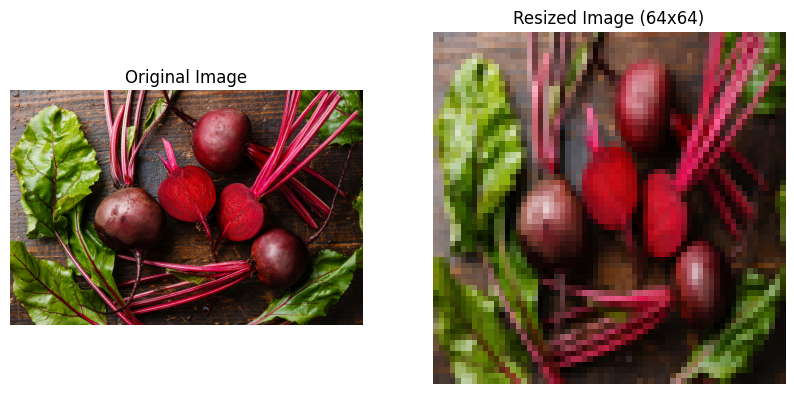

In [48]:
# Define the path to one of the images in your split dataset (e.g., from the training set)
image_path = '/content/drive/MyDrive/DAML fruit&veg/fruit&veg_split/train/beetroot/Image_1.jpg' # Replace with the path to your image

# Load the original image
original_image = tf.keras.utils.load_img(image_path)

# Resize the image to 64x64
resized_image = original_image.resize((64, 64))

# Convert the images to numpy arrays for plotting
original_image_array = tf.keras.utils.img_to_array(original_image)
resized_image_array = tf.keras.utils.img_to_array(resized_image)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display the original image
axes[0].imshow(original_image_array.astype("uint8"))
axes[0].set_title("Original Image")
axes[0].axis("off")

# Display the resized image
axes[1].imshow(resized_image_array.astype("uint8"))
axes[1].set_title("Resized Image (64x64)")
axes[1].axis("off")

plt.show()

# Validation image preprocessing

In [49]:
validation_data = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/DAML fruit&veg/fruit&veg_split/validation',
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = None,
    color_mode = 'rgb',
    batch_size = 32,
    image_size = (64,64),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = 'bilinear',
    follow_links = False,
    crop_to_aspect_ratio = False
)

Found 386 files belonging to 33 classes.


# Building the training model!

The model has been varied a lot in the process of optimization (information about this in the exam presentation).

The end result of the model consist of:

*  Data augmentation to improve the validation accuracy of the model
*  Three convolutional layers
*  Batch normalization
*  Pooling
*  Compiling the model (Adam optimizer, learning rate)
*  Cross-validation (testing dropout rate)

**Cross-validation:** The model built below has a variable dropout rate since this is used to choose the best performing dropout rate.

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, RandomContrast, RandomBrightness, Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, Activation, RandomTranslation

def build_cnn_model_with_dropout(dropout_rate):
    """
    Builds a CNN model with data augmentation and a specified dropout rate.

    Args:
        dropout_rate (float): The dropout rate to apply.

    Returns:
        tf.keras.models.Sequential: The compiled CNN model.
    """
    # Create a Sequential model for data augmentation
    data_augmentation = Sequential([
        RandomFlip("horizontal_and_vertical"),
        RandomRotation(0.3), # Increased rotation range
        RandomZoom(0.3),      # Increased zoom range
        RandomTranslation(height_factor=0.1, width_factor=0.1), # Added random translation
        RandomContrast(0.2),
        RandomBrightness(0.2),
    ])

    # Create the CNN model with architectural changes and variable dropout
    model = Sequential([
        data_augmentation,
        Conv2D(filters=64, kernel_size=3, input_shape=[64, 64, 3], activation=None),
        BatchNormalization(),
        Activation('relu'),
        MaxPool2D(pool_size=2, strides=2),
        Conv2D(filters=64, kernel_size=3, activation=None),
        BatchNormalization(),
        Activation('relu'),
        MaxPool2D(pool_size=2, strides=2),
        Conv2D(filters=128, kernel_size=3, activation=None),
        BatchNormalization(),
        Activation('relu'),
        MaxPool2D(pool_size=2, strides=2),
        Dropout(rate=dropout_rate),
        Flatten(),
        Dense(units=128, activation='relu'),    #adding 128 neurons
        Dense(units=33, activation='softmax')   #final output layer 33 neurons due to 33 different classes of fruit/veg
    ])

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

## Cross-validation
Here cross-validation is performed to figure out which dropout rate is the best performing one for this model.

The model will be trained and evaluated with the different dropout rates.

It is only done for 10 epochs to not cause a too long run-time.



### Defining different dropout rates to test

The tested dropout rates chosen are: 0.2, 0.3, 0.4, 0.5 and 0.6.


In [3]:
# the different dropout rates are stored in a list.
dropout_rates_to_test = [0.2, 0.3, 0.4, 0.5, 0.6]
print("Dropout rates to be tested:", dropout_rates_to_test)

Dropout rates to be tested: [0.2, 0.3, 0.4, 0.5, 0.6]


### Run 10 epochs with each dropout rate

In [10]:
results = {}
epochs = 10 # since we don't want a too long run-time

for dropout_rate in dropout_rates_to_test:
    print(f"Training model with dropout rate: {dropout_rate}")

    # Build the model with the current dropout rate
    model = build_cnn_model_with_dropout(dropout_rate)

    # Train the model
    history = model.fit(x=train_data, validation_data=validation_data, epochs=epochs, verbose=0) # Set verbose to 0 to reduce output

    # Evaluate the model on the validation data
    loss, accuracy = model.evaluate(validation_data, verbose=0) # Set verbose to 0 to reduce output

    # Store the results
    results[dropout_rate] = {
        'history': history.history,
        'validation_accuracy': accuracy,
        'validation_loss': loss
    }
    print(f"Validation Accuracy: {accuracy:.4f}, Validation Loss: {loss:.4f}\n")

print("Training and evaluation for all dropout rates completed.")

Training model with dropout rate: 0.2


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Validation Accuracy: 0.2617, Validation Loss: 2.4314

Training model with dropout rate: 0.3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Validation Accuracy: 0.2850, Validation Loss: 2.4808

Training model with dropout rate: 0.4


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Validation Accuracy: 0.1891, Validation Loss: 2.7557

Training model with dropout rate: 0.5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Validation Accuracy: 0.2383, Validation Loss: 2.3531

Training model with dropout rate: 0.6


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Validation Accuracy: 0.3083, Validation Loss: 2.3213

Training and evaluation for all dropout rates completed.


### Comparison of the validation accuracies from the crossvalidation

In [11]:
best_dropout_rate = None
highest_validation_accuracy = 0

print("Validation Accuracy for each dropout rate:")
for dropout_rate, result in results.items():
    accuracy = result['validation_accuracy']
    loss = result['validation_loss']
    print(f"Dropout Rate: {dropout_rate:.1f}, Validation Accuracy: {accuracy:.4f}, Validation Loss: {loss:.4f}")

    if accuracy > highest_validation_accuracy:
        highest_validation_accuracy = accuracy
        best_dropout_rate = dropout_rate

print(f"\nBest dropout rate: {best_dropout_rate:.1f} with Validation Accuracy: {highest_validation_accuracy:.4f}")

Validation Accuracy for each dropout rate:
Dropout Rate: 0.2, Validation Accuracy: 0.2617, Validation Loss: 2.4314
Dropout Rate: 0.3, Validation Accuracy: 0.2850, Validation Loss: 2.4808
Dropout Rate: 0.4, Validation Accuracy: 0.1891, Validation Loss: 2.7557
Dropout Rate: 0.5, Validation Accuracy: 0.2383, Validation Loss: 2.3531
Dropout Rate: 0.6, Validation Accuracy: 0.3083, Validation Loss: 2.3213

Best dropout rate: 0.6 with Validation Accuracy: 0.3083


### Building the model with the optimal dropout rate (0.6)

Now the model is chosen to have the dropout rate of 0.6 and furthermore 50 epochs is chosen to train the model.

In [22]:
model_final = build_cnn_model_with_dropout(0.6)

history_train_final = model_final.fit(x=train_data, validation_data=validation_data, epochs=50) # Increased epochs to 50

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


59/59 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - accuracy: 0.0404 - loss: 3.9857 - val_accuracy: 0.0648 - val_loss: 3.5542
Epoch 2/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step - accuracy: 0.1160 - loss: 3.1539 - val_accuracy: 0.0933 - val_loss: 3.5725
Epoch 3/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 126s 1s/step - accuracy: 0.1507 - loss: 2.9731 - val_accuracy: 0.0881 - val_loss: 3.6567
Epoch 4/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 90s 1s/step - accuracy: 0.1923 - loss: 2.7463 - val_accuracy: 0.1425 - val_loss: 3.1377
Epoch 5/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - accuracy: 0.2168 - loss: 2.6463 - val_accuracy: 0.1839 - val_loss: 2.9697
Epoch 6/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - accuracy: 0.2129 - loss: 2.5341 - val_accuracy: 0.1710 - val_loss: 2.9272
Epoch 7/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 132s 1s/step - accuracy: 0.2297 - loss: 2.4664 - val_accuracy: 0.1632 - val_loss: 3.2235
Epoch 8/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.2597 - loss: 2.3623 - val_accuracy: 0.2435 - val_loss: 2.5510


### Saving the model
Saving the trained model in a json file so the trained model can be used without having to run the model every time.

In [34]:
# !Remember to rename the file if a new training is carried out!

import json
with open('/content/drive/MyDrive/DAML fruit&veg/history_train_final_50epochs_23giugno.json', 'w') as f:
    json.dump(history_train_final.history, f)

### Plotting the accuracy and losses of trained model

To get an overview of the process of the training model during its training phase.

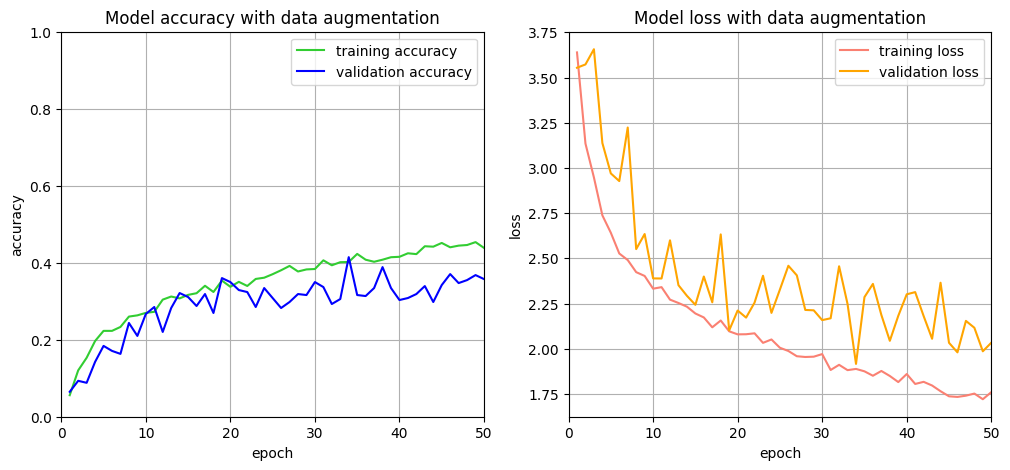

In [44]:
# Define the path to the history JSON file
history_file_path = '/content/drive/MyDrive/DAML fruit&veg/history_train_final_50epochs_23giugno.json'

# Load the training history from the JSON file
with open(history_file_path, 'r') as f:
    history = json.load(f)

# Creating x-axis with epochs
epochs = range(1, len(history['accuracy'])+1)

# Plotting the accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, history['accuracy'], color='limegreen', label='training accuracy')
plt.plot(epochs, history['val_accuracy'], color='blue', label='validation accuracy')
plt.title('Model accuracy with data augmentation')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.xlim(0, len(epochs)) # Adjust x-axis limit to the number of epochs
plt.ylim(0, 1)
plt.legend()
plt.grid()

# Plotting the loss
plt.subplot(1, 2, 2)
plt.plot(epochs, history['loss'], color='salmon', label='training loss')
plt.plot(epochs, history['val_loss'], color='orange', label='validation loss')
plt.title('Model loss with data augmentation')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.xlim(0, len(epochs)) # Adjust x-axis limit to the number of epochs
plt.legend()
plt.grid()

plt.show()

#Testing the model
In the following part the model will be tested.


## Defining test_data
First we have to define the test_data that we are testing our trained model with.

In [14]:
test_data = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/DAML fruit&veg/fruit&veg_split/test',
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = None,
    color_mode = 'rgb',
    batch_size = 32,
    image_size = (64,64),
    shuffle = False, # No need to shuffle test data
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = 'bilinear',
    follow_links = False,
    crop_to_aspect_ratio = False
)

Found 436 files belonging to 33 classes.


##Evaluating the model
Here the model is evaluated. It ends up giving a test accuracy of 36.24 %. This is of course not the best but it's reasonable and this reason for this is the data used in this CNN model for fruit & vegetables.
In some ways it is not the best data and also the dataset is small. A more reprensative and larger dataset would probably give a better result.

In [42]:
loss, accuracy = model_final.evaluate(test_data)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 13s 903ms/step - accuracy: 0.3160 - loss: 2.3607
Test Loss: 2.0541
Test Accuracy: 0.3624


In [36]:
# The true labels of the fruit & vegetables are defined so they can be displayed on the plots.

true_labels = []
for images, labels in test_data:
    true_labels.append(labels.numpy())

true_labels = np.concatenate(true_labels, axis=0)

print("Shape of true_labels:", true_labels.shape)

Shape of true_labels: (436, 33)


In [37]:
# printing the class_names to be sure we have the correct ones.

class_names = test_data.class_names
print(class_names)

['apple', 'aubergine', 'banana', 'beetroot', 'cabbage', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'pear', 'peas', 'pepper', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweet potato', 'tomato', 'turnip', 'watermelon']


## Confusion matrix

A confusion matrix is a useful tool to get a overview of the result of the test. It's good for recognizing the behaviour of the model and get an idea of where it is performing good and where it is struggling.

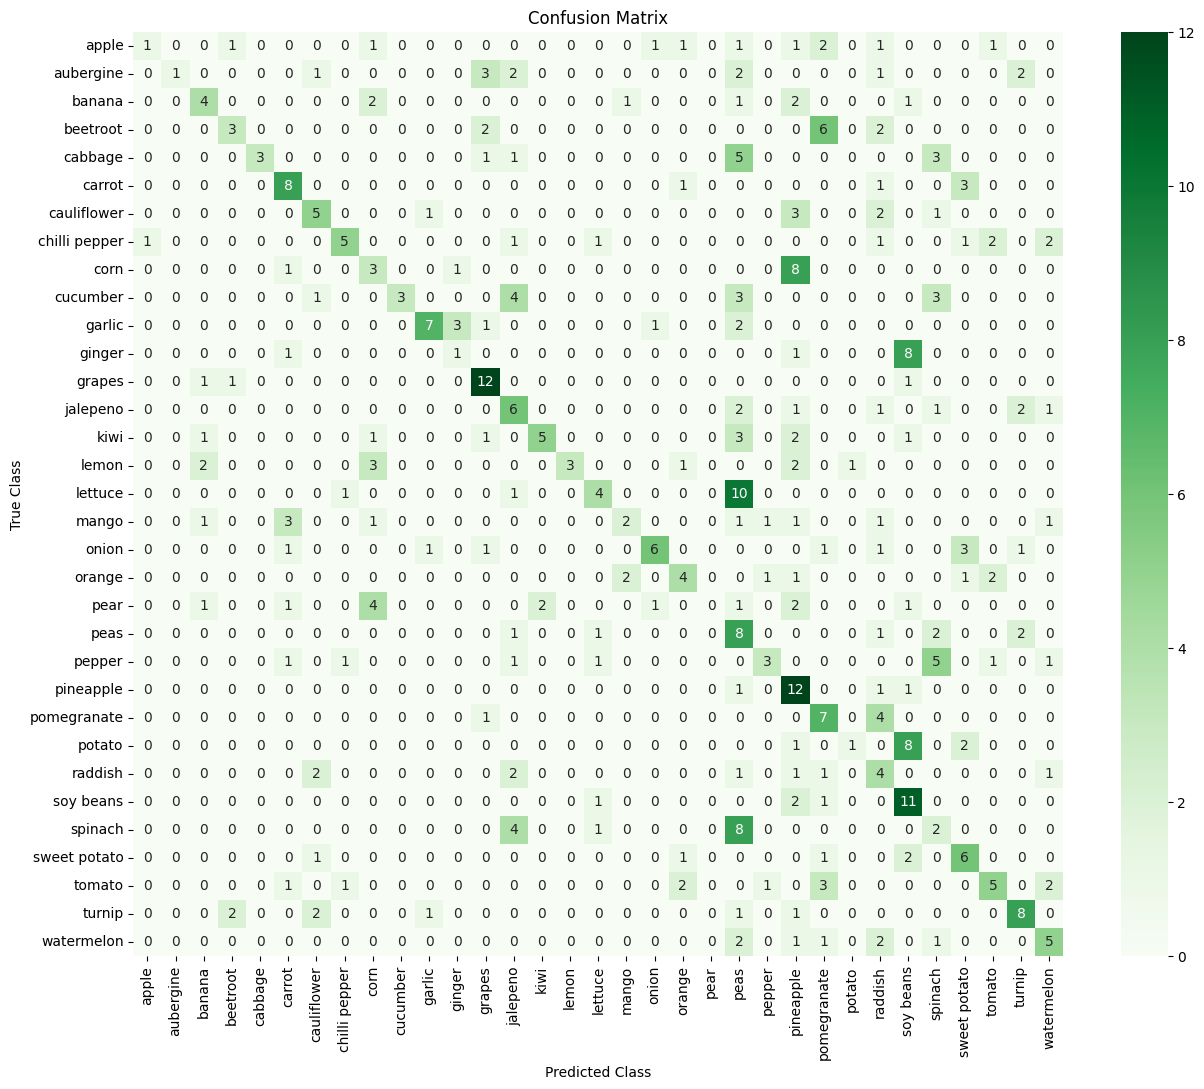

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get the predicted class indices
predicted_class_indices = np.argmax(predictions, axis=1)

# Get the true class indices
true_class_indices = np.argmax(true_labels, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(true_class_indices, predicted_class_indices)

# Plot the confusion matrix
plt.figure(figsize=(15, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()

## Plot showing examples of the true fruit/veg and the predicted fruit/veg

As the last part a plot is created to give an overview and example of the performance of the created model.

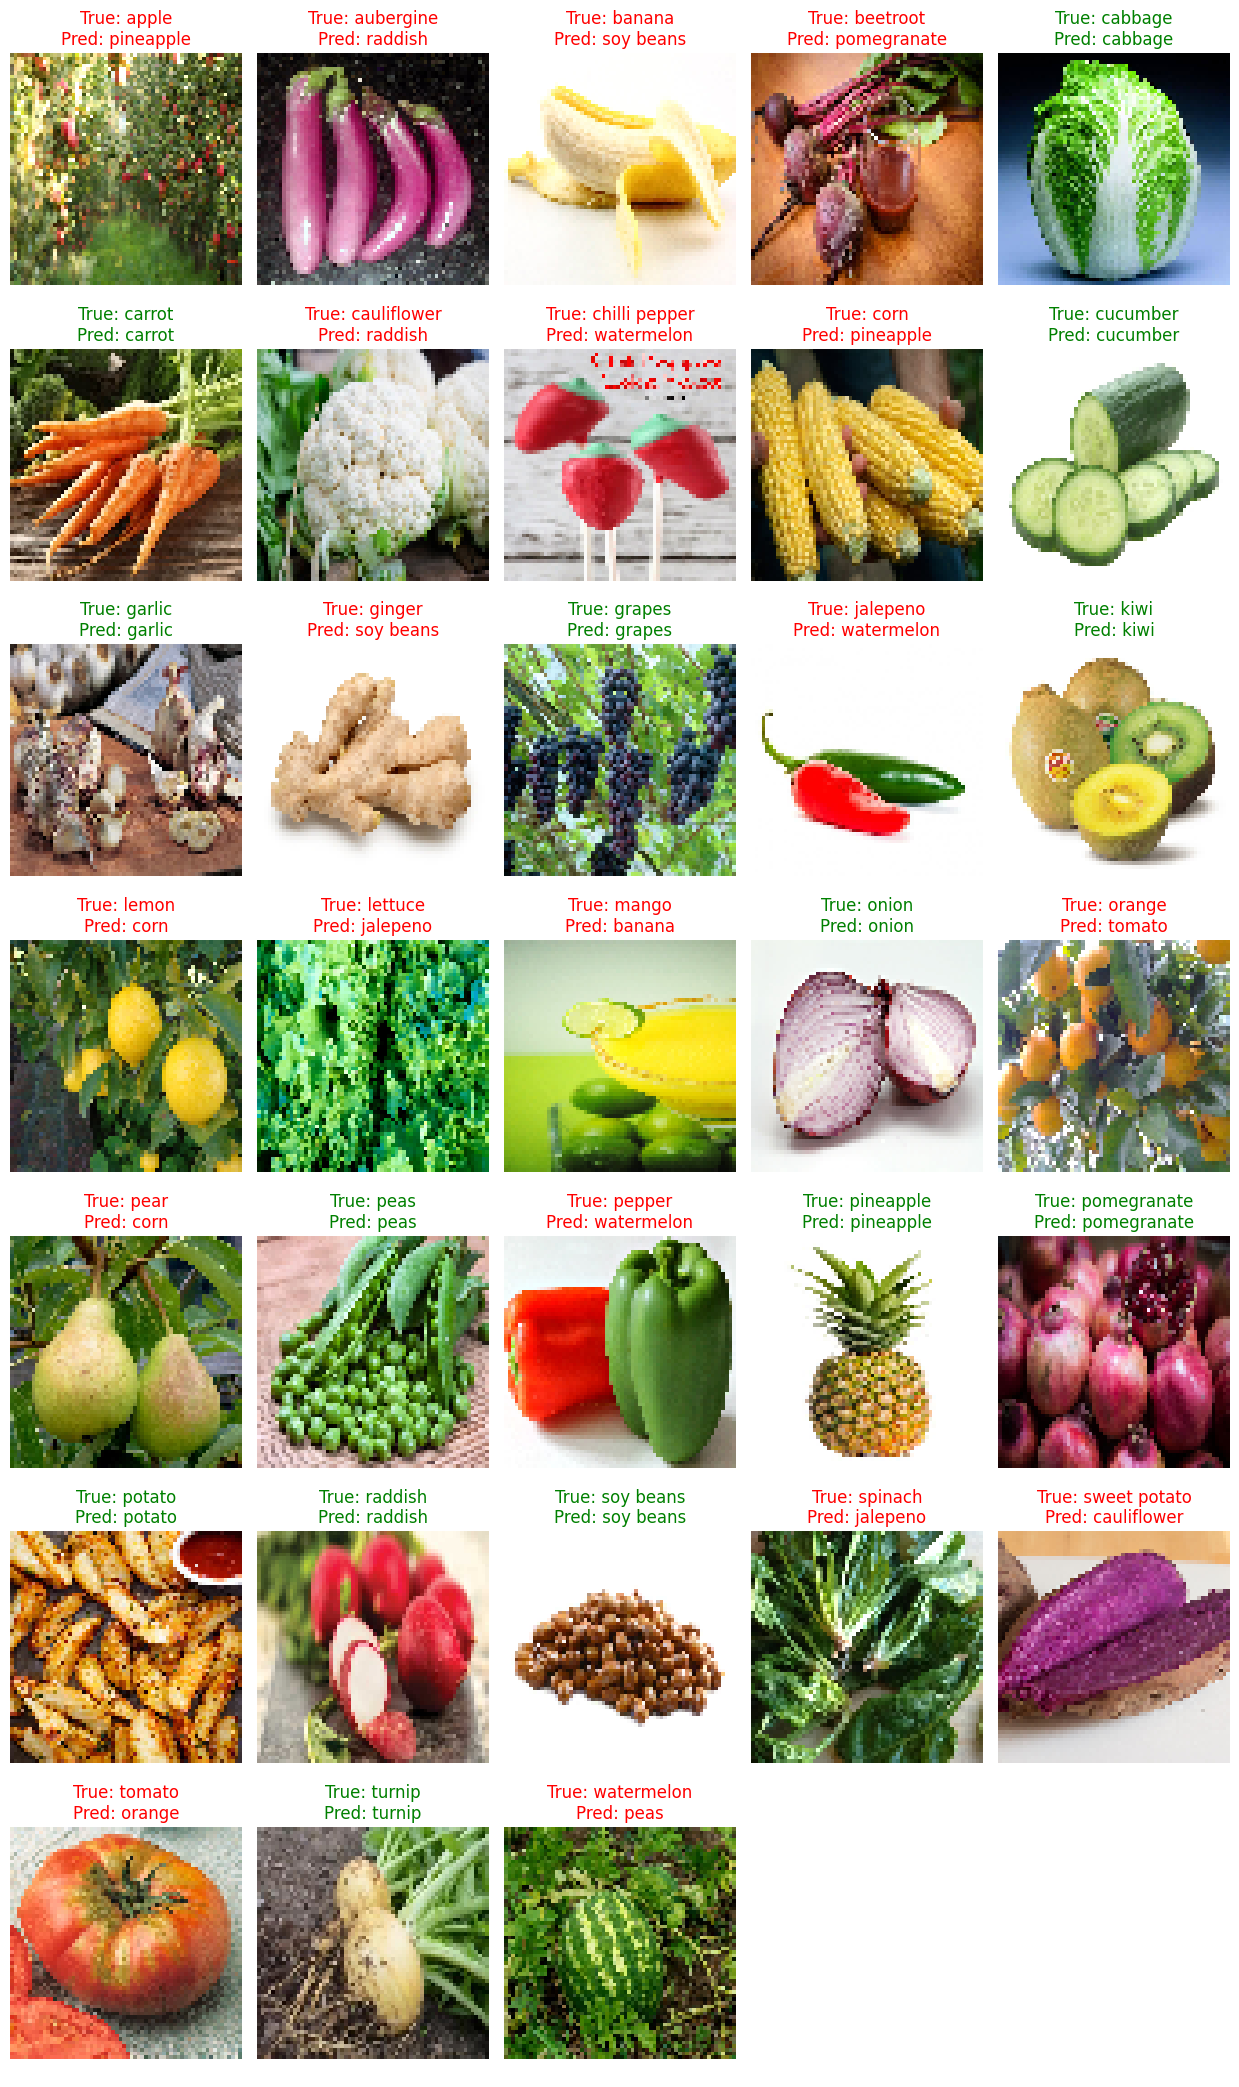

In [40]:
import os

# Get the list of class names
class_names = test_data.class_names
num_classes = len(class_names)

# Select one image file path for each class from the test data
selected_file_paths = []
selected_true_labels = []
selected_predictions = []

for i, class_name in enumerate(class_names):
    class_path = os.path.join('/content/drive/MyDrive/DAML fruit&veg/fruit&veg_split/test', class_name)
    # Get the first image file in the class directory (assuming there's at least one)
    image_files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
    if image_files:
        img_path = os.path.join(class_path, image_files[0])
        selected_file_paths.append(img_path)

        # Find the index of this image in the original test_data file paths
        # This is a bit inefficient, but needed to get the corresponding true label and prediction
        # A more efficient way would be to build the selected_indices list directly from test_data.file_paths
        try:
            original_index = test_data.file_paths.index(img_path)
            selected_true_labels.append(true_labels[original_index])
            selected_predictions.append(predictions[original_index])
        except ValueError:
            print(f"Warning: Could not find {img_path} in test_data.file_paths. Skipping.")


# Determine the predicted and true class names for the selected images
predicted_classes = [class_names[np.argmax(pred)] for pred in selected_predictions]
true_classes = [class_names[np.argmax(true_label)] for true_label in selected_true_labels]

# Plot the images with their true and predicted labels
n_cols = 5
n_rows = (num_classes + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 2.5, n_rows * 3))

for i in range(len(selected_file_paths)):
    img_path = selected_file_paths[i]
    true_class = true_classes[i]
    predicted_class = predicted_classes[i]

    # Load the image
    img = tf.keras.utils.load_img(img_path, target_size=(64, 64))
    img_array = tf.keras.utils.img_to_array(img)

    plt.subplot(n_rows, n_cols, i + 1)
    plt.imshow(img_array.astype("uint8"))

    # Set title color based on prediction accuracy
    color = 'green' if true_class == predicted_class else 'red'
    plt.title(f"True: {true_class}\nPred: {predicted_class}", color=color)
    plt.axis("off")

# Hide any unused subplots
for j in range(len(selected_file_paths), n_rows * n_cols):
    plt.subplot(n_rows, n_cols, j + 1).axis("off")


plt.tight_layout()
plt.show()